In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import MetaTrader5 as mt5
from account_credentials import LOGIN, PASSWORD, SERVER
from datetime import datetime, timedelta

In [2]:
is_initialized = mt5.initialize()
print('initialize: ', is_initialized)

is_logged_in = mt5.login(LOGIN, PASSWORD, SERVER)
print('logged in: ', is_logged_in)
print('\n')
account_info = mt5.account_info()
print(datetime.now(),
    '| Login: ', account_info.login,
    '| Balance: ', account_info.balance,
    '| Equity: ' , account_info.equity)

initialize:  True
logged in:  True


2023-04-20 09:35:15.403822 | Login:  114123121 | Balance:  522.59 | Equity:  522.59


In [3]:
import MetaTrader5 as mt5
from datetime import datetime, timedelta

# connect to MetaTrader 5
mt5.initialize()

# set the time range for the history
start_time = datetime.now() - timedelta(days=100)
end_time = datetime.now()

# retrieve the history
history = mt5.history_deals_get(start_time, end_time)

# Create an empty dataframe
df = pd.DataFrame(columns=['Time','Deal ID', 'Order Ticket', 'Type', 'Volume', 'Price', 'Profit', 'Comment', 'Magic'])

# Iterate through the trade history and create a list of dataframes
dfs = []
for deal in history:
    row = {'Time': pd.Timestamp(deal.time, unit='s'),
           'Deal ID': deal.order,
           'Order Ticket': deal.ticket,
           'Type': 'Buy' if deal.type == 0 else 'Sell',
           'Volume': deal.volume,
           'Price': deal.price,
           'Profit': deal.profit,
           'Comment': deal.comment,
           'Magic': deal.magic}
    dfs.append(pd.DataFrame(row, index=[0]))

# Concatenate all dataframes into a single dataframe
df = pd.concat(dfs, ignore_index=True)

# Print the resulting dataframe
df

,Time,Deal ID,Order Ticket,Type,Volume,Price,Profit,Comment,Magic
0,2023-03-23 01:46:47,0,143696145,Sell,0.00,0.000,500.00,D-trial-USD-INT-98b2867537b3,0
1,2023-03-28 02:09:05,266948417,145348938,Buy,0.01,1960.969,0.00,ML_lsvm,123999
2,2023-03-28 02:29:00,266953667,145353163,Buy,0.01,1960.427,0.00,ML_lsvm,123999
3,2023-03-28 03:03:56,266962782,145360604,Buy,0.02,1961.108,0.00,,0
4,2023-03-28 04:18:59,266982644,145377761,Sell,0.02,1958.718,-4.78,,0
...,...,...,...,...,...,...,...,...,...
256,2023-04-20 00:26:00,278183260,152978376,Buy,0.01,1996.583,0.00,,0
257,2023-04-20 00:26:06,278183310,152978402,Sell,0.01,1996.427,-0.15,,0
258,2023-04-20 01:06:17,278194948,152986611,Sell,0.01,1993.014,-3.13,[sl 1993.014],123992
259,2023-04-20 01:32:53,278204227,152992414,Buy,0.01,1997.137,-3.13,[sl 1997.137],123992


<details>
<summary>Backup Model V1</summary>

```python
print("------MODEL--------")
# TP and SL should be 3.13
TPSL_base = 3.13

print("All Samples",len(df_adjust[df_adjust["Magic"] == 123999]))
m1_df = df_adjust[df_adjust["Magic"] == 123999]
Profit = sum(m1_df["Profit"])
print(f"Profit ${Profit:.2f}")
Accuracy = (m1_df["Profit"] > 0).sum() / len(m1_df)
print(f"Accuracy {Accuracy*100:.2f}%")


Lost_standard = ((m1_df["Profit"] < 0).sum() * TPSL_base) #Positive Value
Lost_actual = (sum(m1_df[m1_df["Profit"] < 0]["Profit"])) # Negative Value
Lost_error = Lost_standard + Lost_actual # if result = positive then Lost_standard > Lost_actual
print(f"Lost Error ${Lost_error:.2f}")

Win_standard = ((m1_df["Profit"] > 0).sum() * TPSL_base) #Positive Value
Win_actual = (sum(m1_df[m1_df["Profit"] > 0]["Profit"])) # Positive Value
Win_error = Win_actual - Win_standard # if result = positive then the actual win is higher than standard win
print(f"Win Error ${Win_error:.2f}")
```
</details>


In [4]:
df_adjust = df[(df['Profit'] != 0) & (abs(df['Profit']) > 3) & (abs(df['Profit']) != 500) & (abs(df['Magic']) != 0)]
df_adjust.reset_index(inplace=True)
df_adjust.to_csv('history_price.csv')
df_adjust

,index,Time,Deal ID,Order Ticket,Type,Volume,Price,Profit,Comment,Magic
0,56,2023-03-29 15:08:09,267851674,146078214,Sell,0.01,1966.148,-3.12,[sl 1966.148],123999
1,58,2023-03-29 17:41:33,267915037,146134790,Sell,0.01,1968.253,3.12,[tp 1968.253],123999
2,60,2023-03-29 19:01:04,267933799,146151811,Sell,0.01,1966.052,-3.13,[sl 1966.052],123999
3,76,2023-03-30 16:00:46,268440990,146546900,Sell,0.01,1975.363,3.12,[tp 1975.363],123999
4,78,2023-03-30 17:13:31,268486375,146586099,Sell,0.01,1980.361,-3.13,[sl 1980.361],123999
...,...,...,...,...,...,...,...,...,...,...
87,254,2023-04-19 23:42:32,278173045,152971349,Sell,0.01,1993.256,-3.12,[sl 1993.256],123993
88,255,2023-04-19 23:42:50,278173158,152971389,Sell,0.01,1993.156,-3.12,[sl 1993.156],123999
89,258,2023-04-20 01:06:17,278194948,152986611,Sell,0.01,1993.014,-3.13,[sl 1993.014],123992
90,259,2023-04-20 01:32:53,278204227,152992414,Buy,0.01,1997.137,-3.13,[sl 1997.137],123992


In [5]:
#type SEll >>> คือ buy ที่ขายออก
#type Buy >>> คือ sell ที่ซื้อออก
def get_summary(df_adjust, Magic, TPSL_base, Type_see):
    if Type_see == 'Buy':
        Type_cal = 'Sell'
    if Type_see == 'Sell':
        Type_cal = 'Buy'
    Order_type = Type_see
    Samples = len(df_adjust[(df_adjust["Magic"] == Magic) & (df_adjust["Type"] == Type_cal )])
    buy = df_adjust[(df_adjust["Magic"] == Magic) & (df_adjust["Type"] == Type_cal)]
    buy_profit = buy["Profit"]
    Profit = round(sum(buy_profit), 2)
    Accuracy = (buy["Profit"] > 0).sum() / len(buy["Profit"])
    standard = ((buy["Profit"] > 0).sum() * TPSL_base) - ((buy["Profit"] < 0).sum() * TPSL_base)
    error = round(Profit - standard, 2)
    return Samples, Order_type, Profit, Accuracy, error

In [6]:
summary_df = pd.DataFrame(columns=['Model', 'Samples', 'Order_type', 'Profit', 'Accuracy', 'error'])
#print("---------V1")
Samples, Order_type, Profit, Accuracy, error = get_summary(df_adjust, 123999, 3.13, "Buy")
# print(f"Samples: {Samples}")
# print(f"Order_type: {Order_type}")
# print(f"Profit: ${Profit:.2f}")
# print(f"Accuracy {Accuracy*100:.2f}%")
# print(f"Error buy ${error:.2f}")
Model = 'v1'
new_row = pd.DataFrame({'Model': Model, 'Samples': Samples, 'Order_type': Order_type, 'Profit': Profit, 'Accuracy': Accuracy, 'error': error}, index=[0])
summary_df = pd.concat([summary_df, new_row], axis=0,ignore_index=True)

#print("--------V2")
Samples, Order_type, Profit, Accuracy, error = get_summary(df_adjust, 123992, 3.13, "Buy")
# print(f"Samples: {Samples}")
# print(f"Order_type: {Order_type}")
# print(f"Profit: ${Profit:.2f}")
# print(f"Accuracy {Accuracy*100:.2f}%")
# print(f"Error buy ${error:.2f}")
Model = "v2_buy"
new_row = pd.DataFrame({'Model': Model, 'Samples': Samples, 'Order_type': Order_type, 'Profit': Profit, 'Accuracy': Accuracy, 'error': error}, index=[0])
summary_df = pd.concat([summary_df, new_row], axis=0,ignore_index=True)

Samples, Order_type, Profit, Accuracy, error = get_summary(df_adjust, 123992, 3.13, "Sell")
# print(f"Samples: {Samples}")
# print(f"Order_type: {Order_type}")
# print(f"Profit: ${Profit:.2f}")
# print(f"Accuracy {Accuracy*100:.2f}%")
# print(f"Error buy ${error:.2f}")
Model = "v2_sell"
new_row = pd.DataFrame({'Model': Model, 'Samples': Samples, 'Order_type': Order_type, 'Profit': Profit, 'Accuracy': Accuracy, 'error': error}, index=[0])
summary_df = pd.concat([summary_df, new_row], axis=0,ignore_index=True)

#print("V2b")
Samples, Order_type, Profit, Accuracy, error = get_summary(df_adjust, 123993, 3.13, "Buy")
# print(f"Samples: {Samples}")
# print(f"Order_type: {Order_type}")
# print(f"Profit_buy: ${Profit:.2f}")
# print(f"Accuracy {Accuracy*100:.2f}%")
# print(f"Error buy ${error:.2f}")
Model = 'v2b_buy'
new_row = pd.DataFrame({'Model': Model, 'Samples': Samples, 'Order_type': Order_type, 'Profit': Profit, 'Accuracy': Accuracy, 'error': error}, index=[0])
summary_df = pd.concat([summary_df, new_row], axis=0,ignore_index=True)

Samples, Order_type, Profit, Accuracy, error = get_summary(df_adjust, 123993, 3.13, "Sell")
# print(f"Samples: {Samples}")
# print(f"Order_type: {Order_type}")
# print(f"Profit_buy: ${Profit:.2f}")
# print(f"Accuracy {Accuracy*100:.2f}%")
# print(f"Error buy ${error:.2f}")
Model = 'v2b_sell'
new_row = pd.DataFrame({'Model': Model, 'Samples': Samples, 'Order_type': Order_type, 'Profit': Profit, 'Accuracy': Accuracy, 'error': error}, index=[0])
summary_df = pd.concat([summary_df, new_row], axis=0,ignore_index=True)

#print("V2c")
Samples, Order_type, Profit, Accuracy, error = get_summary(df_adjust, 123994, 3.13, "Buy")
# print(f"Samples: {Samples}")
# print(f"Order_type: {Order_type}")
# print(f"Profit_buy: ${Profit:.2f}")
# print(f"Accuracy {Accuracy*100:.2f}%")
# print(f"Error buy ${error:.2f}")
Model = 'v2c_buy'
new_row = pd.DataFrame({'Model': Model, 'Samples': Samples, 'Order_type': Order_type, 'Profit': Profit, 'Accuracy': Accuracy, 'error': error}, index=[0])
summary_df = pd.concat([summary_df, new_row], axis=0,ignore_index=True)


Samples, Order_type, Profit, Accuracy, error = get_summary(df_adjust, 123994, 3.13, "Sell")
# print(f"Samples: {Samples}")
# print(f"Order_type: {Order_type}")
# print(f"Profit_buy: ${Profit:.2f}")
# print(f"Accuracy {Accuracy*100:.2f}%")
# print(f"Error buy ${error:.2f}")
Model = 'v2c_sell'
new_row = pd.DataFrame({'Model': Model, 'Samples': Samples, 'Order_type': Order_type, 'Profit': Profit, 'Accuracy': Accuracy, 'error': error}, index=[0])
summary_df = pd.concat([summary_df, new_row], axis=0,ignore_index=True)
summary_df


,Model,Samples,Order_type,Profit,Accuracy,error
0,v1,38,Buy,20.39,0.578947,1.61
1,v2_buy,15,Buy,17.28,0.666667,1.63
2,v2_sell,27,Sell,-10.30,0.481481,-7.17
3,v2b_buy,3,Buy,4.65,0.666667,1.52
4,v2b_sell,5,Sell,3.12,0.600000,-0.01
5,v2c_buy,1,Buy,3.12,1.000000,-0.01
6,v2c_sell,3,Sell,3.11,0.666667,-0.02


In [7]:
total_profit = summary_df['Profit'].sum()
print(f"Total_profit ${total_profit:.2f}")
total_win_rate = summary_df['Accuracy'].mean()
print(f"Average accuracy {total_win_rate*100:.2f}%")
print(df['Profit'].sum())

Total_profit $41.37
Average accuracy 66.58%
522.59


In [8]:
df_summary = df_adjust["Profit"]
df_summary["Capital"] = 500

C:\Users\pkong\AppData\Local\Temp\ipykernel_27844\835664279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary["Capital"] = 500
C:\Users\pkong\AppData\Local\Temp\ipykernel_27844\835664279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary["Capital"] = 500


In [9]:
import pandas as pd

# Create a sample DataFrame
df_summary = df_adjust[["Profit","Time"]]
df_summary.loc[0,'Profit'] = df_summary.loc[0,'Profit'] + 500
df_summary['Profit_cum'] = df_summary['Profit'].cumsum()
df_summary

C:\Users\pkong\AppData\Local\Temp\ipykernel_27844\919511930.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary['Profit_cum'] = df_summary['Profit'].cumsum()


,Profit,Time,Profit_cum
0,496.88,2023-03-29 15:08:09,496.88
1,3.12,2023-03-29 17:41:33,500.00
2,-3.13,2023-03-29 19:01:04,496.87
3,3.12,2023-03-30 16:00:46,499.99
4,-3.13,2023-03-30 17:13:31,496.86
...,...,...,...
87,-3.12,2023-04-19 23:42:32,553.87
88,-3.12,2023-04-19 23:42:50,550.75
89,-3.13,2023-04-20 01:06:17,547.62
90,-3.13,2023-04-20 01:32:53,544.49


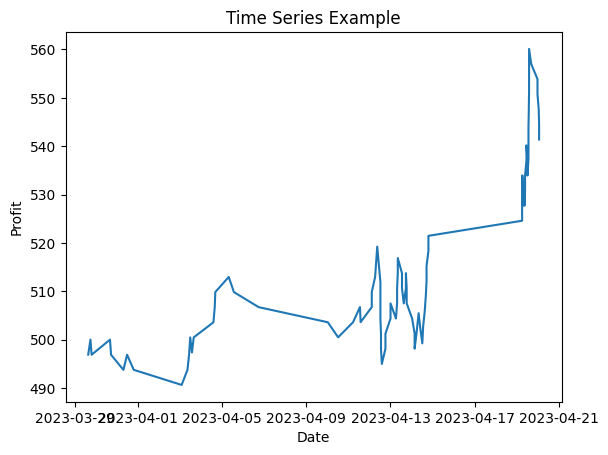

In [10]:
x = df_summary['Time']
y = df_summary['Profit_cum']

plt.plot(x, y)

plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Time Series Example')

plt.show() 

In [11]:
days_passed = (df_summary['Time'].iloc[-1] - df_summary['Time'].iloc[0]).days
print("Number of days :", days_passed)

Number of days : 21


In [13]:
# จะได้กี่บาทนะ ถ้าผ่านไป x วัน

# Days in simulation while training the model
day_in_training = 123

possible_profit = (total_profit * day_in_training)/days_passed
print(f"Profit may gain in {day_in_training} day ${possible_profit:.2f}")
possible_total_fund = possible_profit + 500
print(f"Possible total fund in {day_in_training} day ${possible_total_fund}")
possible_profit_percentage = (possible_total_fund/500-1)*100
print(f"Possible Profit Percentage in {day_in_training} day {possible_profit_percentage:.2f}%     while training we got 84%")
print(f"Possible year gain percentage in 1 year {possible_profit_percentage*3:.2f}%")

Profit may gain in 123 day $242.31
Possible total fund in 123 day $742.31
Possible Profit Percentage in 123 day 48.46%     while training we got 84%
Possible year gain percentage in 1 year 145.39%
